# Rastering toy model

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython import display
import random

In [3]:
mat = np.ones(shape=(264,330))

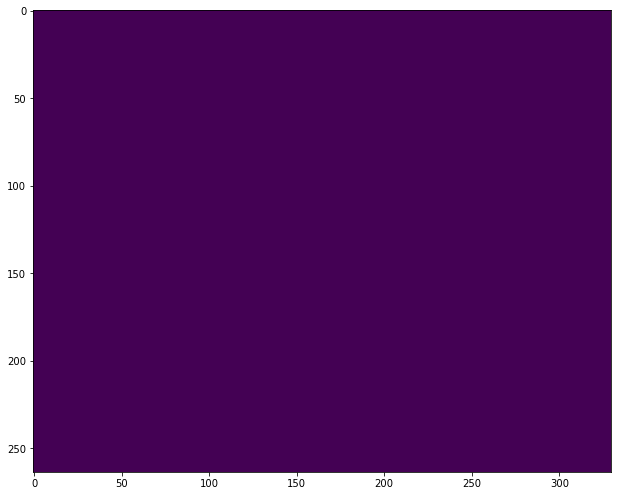

In [4]:
fig, ax = plt.subplots(figsize=(10,7),tight_layout=True)
ax.imshow(mat)

In [19]:
def makeGaussian(size, fwhm = 3, center=None, a=-4):
    """ Make a square gaussian kernel.

    size is the length of a side of the square
    fwhm is full-width-half-maximum, which
    can be thought of as an effective radius.
    """

    x = np.arange(0, size, 1, float)
    y = x[:,np.newaxis]

    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]

    return np.exp(a*np.log(2) * ((x-x0)**2 + (y-y0)**2) / fwhm**2)

In [6]:
gauss = makeGaussian(200, fwhm=20)

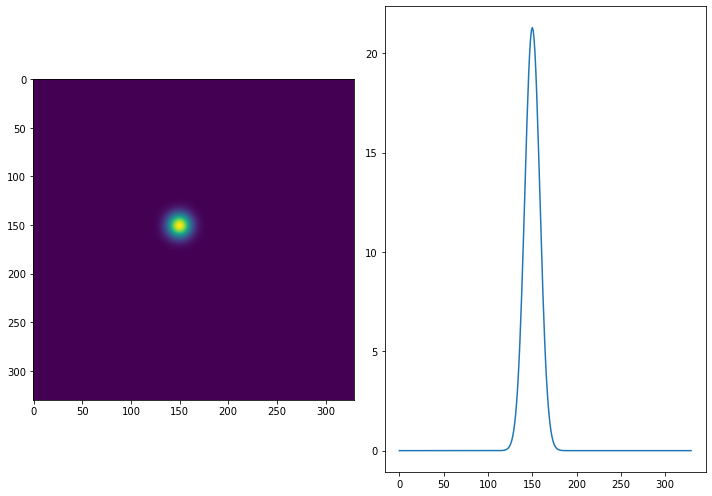

In [6]:
fig, ax = plt.subplots(1,2, figsize=(10,7),tight_layout=True)
gauss = makeGaussian(330, fwhm=20, center=(150,150))

ax[0].imshow(gauss)
ax[1].plot(gauss.sum(axis=0))

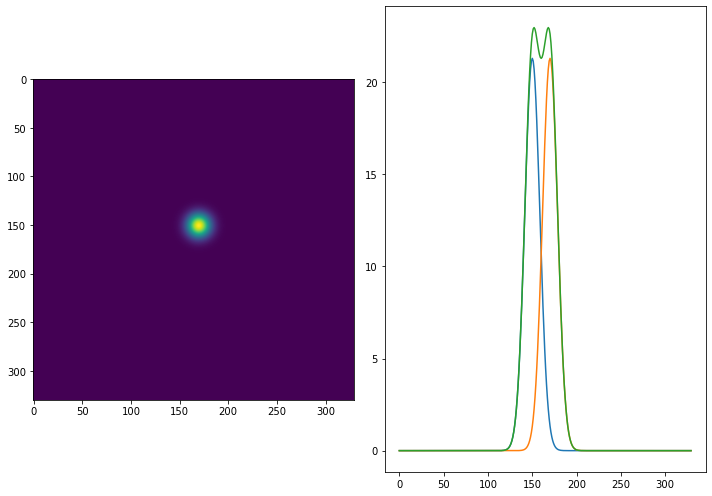

In [7]:
fig, ax = plt.subplots(1,2, figsize=(10,7),tight_layout=True)

gauss1 = makeGaussian(330, fwhm=20, center=(150,150))

ax[0].imshow(gauss1)
ax[1].plot(gauss1.sum(axis=0))

gauss2 = makeGaussian(330, fwhm=20, center=(170,150))

ax[0].imshow(gauss2)
ax[1].plot(gauss2.sum(axis=0))

ax[1].plot(gauss1.sum(axis=0) + gauss2.sum(axis=0))

In [8]:
# %matplotlib widget
# fig, ax = plt.subplots()
# xdata, ydata = [], []

# gauss = makeGaussian(330, fwhm=20, center=(150,150))

# gauss, = plt.imshow(gauss)

# def init():
#     ax.set_xlim(0, 2*np.pi)
#     ax.set_ylim(-1, 1)
#     return gauss,

# def update(frame):
#     xdata.append(frame)
#     ydata.append(np.sin(frame))
#     ln.set_data(xdata, ydata)
#     gauss = makeGaussian(330, fwhm=20, center=(150,150))
#     return gauss,

# ani = FuncAnimation(fig, update, frames=2,
#                     init_func=init, blit=True)
# plt.show()

In [9]:
# %matplotlib widget
# import numpy as np
# import matplotlib.pyplot as plt 
# import matplotlib.animation as animation

# gauss=makeGaussian(330, fwhm=20, center=(150,150))

# def update(i):
#     gauss = makeGaussian(330, fwhm=20, center=(150+i,150))
#     matrice.set_array(gauss)
# #     projection = set_ydata(gauss.sum(axis=0))
#     return projection,
    
# fig, ax = plt.subplots(1,2)
# matrice = ax[0].imshow(gauss)
# # projection, = ax[1].plot(gauss.sum(axis=0))
# plt.colorbar(matrice)

# ani = animation.FuncAnimation(fig, update, frames=20, interval=50, repeat=False)
# plt.show()

In [10]:
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.animation as animation

# fig, ax = plt.subplots(1,2, tight_layout=True)

# gauss = makeGaussian(330, fwhm=20, center=(150,150))
# matrice.set_array(gauss)
# projection = (gauss.sum(axis=0))

# matrice = ax[0].imshow(gauss)
# line, = ax[1].plot(projection)
# line_sum, = ax[1].plot(projection, color="r")


# def animate(i):
#     gauss = makeGaussian(330, fwhm=20, center=(150+i,150))
#     matrice.set_array(gauss)
#     projection = projection + gauss.sum(axis=0)
#     line.set_ydata(gauss.sum(axis=0))  # update the data.
#     line_sum.set_ydata(projection)
    
#     return line, line_sum,


# ani = animation.FuncAnimation(
#     fig, animate, interval=20, blit=True, frames=40, repeat=False)


# # writergif = animation.PillowWriter(fps=30)
# # ani.save('filename.gif',writer=writergif)


# plt.show()

<IPython.core.display.Javascript object>


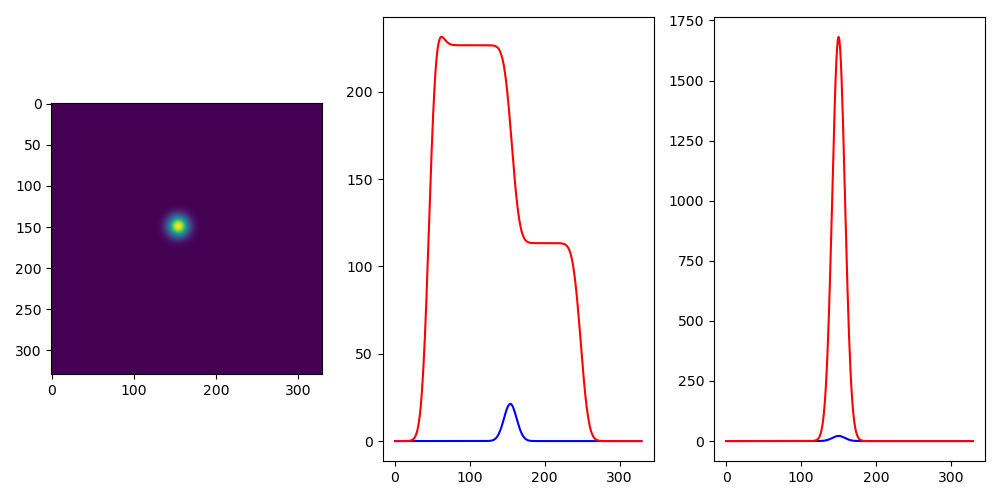

In [87]:
plt.style.use('default')
from matplotlib.animation import FuncAnimation, PillowWriter
%matplotlib notebook
fig, ax  = plt.subplots(1,3, figsize=(10,5), tight_layout=True)

projectionH_old = []
projectionV_old = []

def animate(i):
    global projectionH_old
    global projectionV_old
    ax[0].clear()
    ax[1].clear()
    ax[2].clear()
    gauss = makeGaussian(330, fwhm=20, center=(50+4*i,150))
    ax[0].imshow(gauss)
    try:
        projectionH = gauss.sum(axis=0)
        projectionV = gauss.sum(axis=1)
        ax[1].plot(projectionH, color="b")
        ax[2].plot(projectionV, color="b")
        ax[1].plot(projectionH+projectionH_old, color="r")
        ax[2].plot(projectionV+projectionV_old, color="r")
        projectionH_old = projectionH_old + projectionH
        projectionV_old = projectionV_old + projectionV
    except:
        projectionH = gauss.sum(axis=0)
        projectionV = gauss.sum(axis=1)
        ax[1].plot(projectionH, color="b")
        ax[2].plot(projectionV, color="b")
        projectionH_old = projectionH
        projectionV_old = projectionV
        pass
    
    return
    
ani = FuncAnimation(fig, animate, interval=20, blit=True, repeat=False, frames=50)
ani.save("raster.gif", dpi=300, writer=PillowWriter(fps=10))

# Sin pattern

<IPython.core.display.Javascript object>


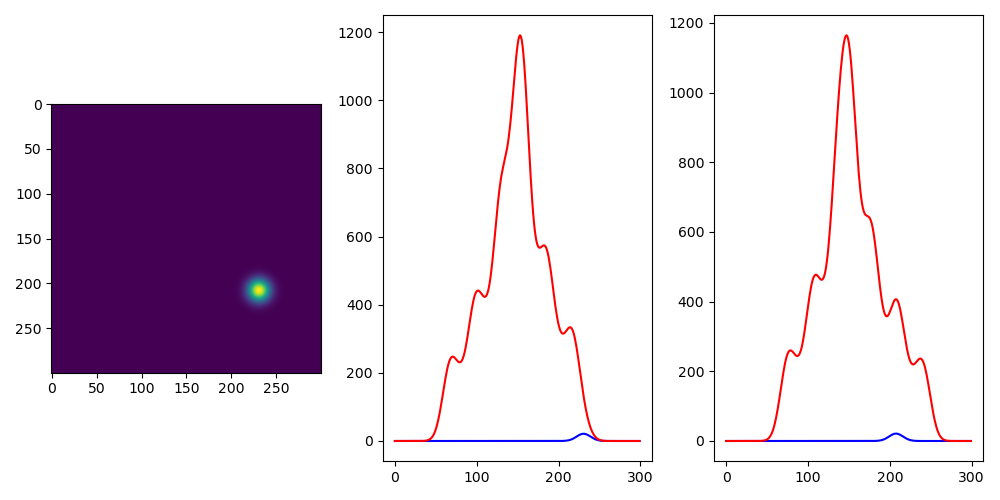

In [110]:
plt.style.use('default')
from matplotlib.animation import FuncAnimation, PillowWriter
%matplotlib notebook
fig, ax  = plt.subplots(1,3, figsize=(10,5), tight_layout=True)

projectionH_old = []
projectionV_old = []

def animate(i):
    step = i/5
    global projectionH_old
    global projectionV_old
    ax[0].clear()
    ax[1].clear()
    ax[2].clear()
    gauss = makeGaussian(300, fwhm=20, center=(150+i*np.sin(np.mod(step,2*np.pi)),150+i*np.cos(np.mod(step,2*np.pi))))
    ax[0].imshow(gauss)
    try:
        projectionH = gauss.sum(axis=0)
        projectionV = gauss.sum(axis=1)
        ax[1].plot(projectionH, color="b")
        ax[2].plot(projectionV, color="b")
        ax[1].plot(projectionH+projectionH_old, color="r")
        ax[2].plot(projectionV+projectionV_old, color="r")
        projectionH_old = projectionH_old + projectionH
        projectionV_old = projectionV_old + projectionV
    except:
        projectionH = gauss.sum(axis=0)
        projectionV = gauss.sum(axis=1)
        ax[1].plot(projectionH, color="b")
        ax[2].plot(projectionV, color="b")
        projectionH_old = projectionH
        projectionV_old = projectionV
        pass
    
    return
    
ani = FuncAnimation(fig, animate, interval=20, blit=True, repeat=False, frames=100)
ani.save("raster.gif", dpi=300, writer=PillowWriter(fps=10))

### Integration on image

<IPython.core.display.Javascript object>


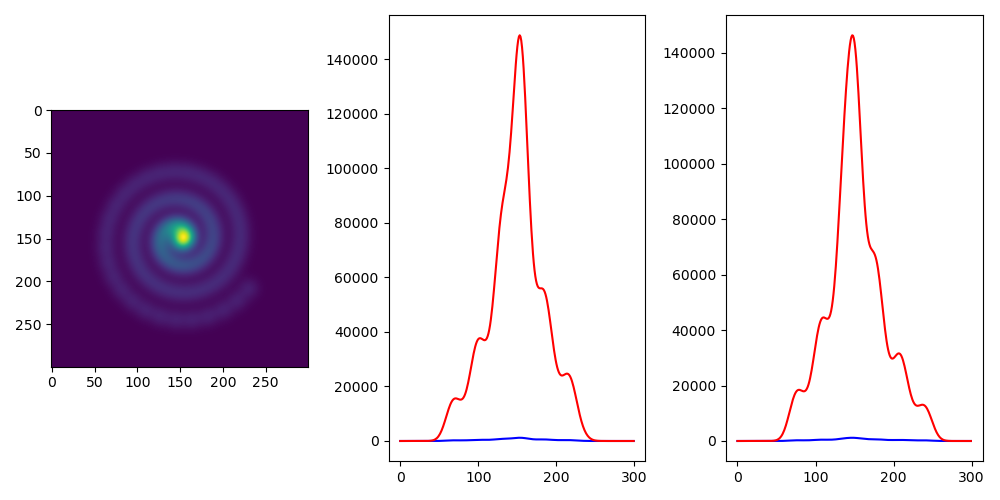

In [120]:
plt.style.use('default')
from matplotlib.animation import FuncAnimation, PillowWriter
%matplotlib notebook
fig, ax  = plt.subplots(1,3, figsize=(10,5), tight_layout=True)

projectionH_old = []
projectionV_old = []
gauss_old = []

def animate(i):
    step = i/5
    global projectionH_old
    global projectionV_old
    global gauss_old
    ax[0].clear()
    ax[1].clear()
    ax[2].clear()
    gauss = makeGaussian(300, fwhm=20, center=(150+i*np.sin(np.mod(step,2*np.pi)),150+i*np.cos(np.mod(step,2*np.pi))))
    
    try:
        projectionH = gauss_old.sum(axis=0)
        projectionV = gauss_old.sum(axis=1)
        ax[0].imshow(gauss + gauss_old)
        ax[1].plot(projectionH, color="b")
        ax[2].plot(projectionV, color="b")
        ax[1].plot(projectionH+projectionH_old, color="r")
        ax[2].plot(projectionV+projectionV_old, color="r")
        projectionH_old = projectionH_old + projectionH
        projectionV_old = projectionV_old + projectionV
        gauss_old = gauss_old + gauss
    except:
        projectionH = gauss.sum(axis=0)
        projectionV = gauss.sum(axis=1)
        ax[0].imshow(gauss)
        ax[1].plot(projectionH, color="b")
        ax[2].plot(projectionV, color="b")
        projectionH_old = projectionH
        projectionV_old = projectionV
        gauss_old = gauss
        pass
    
    return
    
ani = FuncAnimation(fig, animate, interval=20, blit=True, repeat=False, frames=100)
ani.save("raster_remnant_spiral.gif", dpi=300, writer=PillowWriter(fps=10))

# Decreasing the amplitude as it grows

<IPython.core.display.Javascript object>


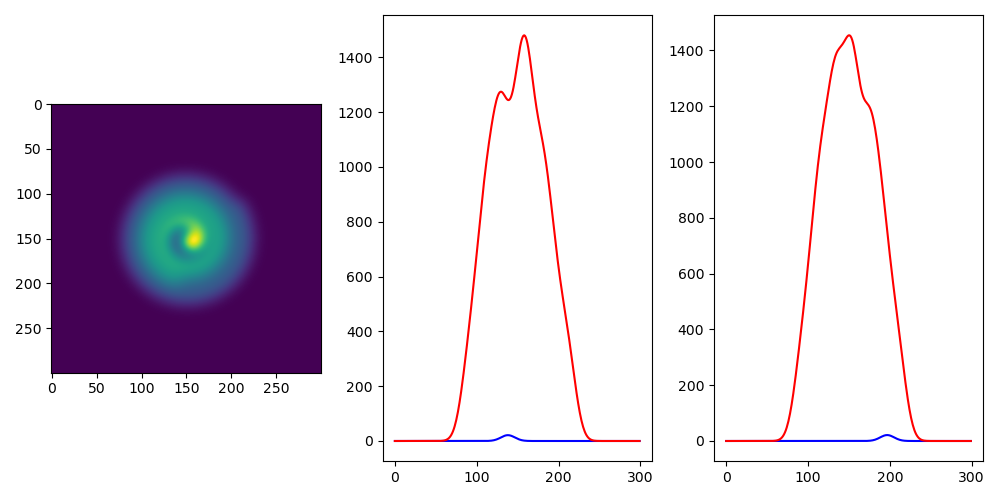

In [169]:
plt.style.use('default')
from matplotlib.animation import FuncAnimation, PillowWriter
%matplotlib notebook
fig, ax  = plt.subplots(1,3, figsize=(10,5), tight_layout=True)

projectionH_old = []
projectionV_old = []
gauss_old = []

def animate(i):
    step = i/5
    global projectionH_old
    global projectionV_old
    global gauss_old
    ax[0].clear()
    ax[1].clear()
    ax[2].clear()
    gauss = makeGaussian(300, fwhm=20, center=(150+10*np.sqrt(i/4)*np.sin(np.mod(step,2*np.pi)),150+10*np.sqrt(i/4)*np.cos(np.mod(step,2*np.pi))))
    
    try:
        ax[0].imshow(gauss + gauss_old)
        ax[1].plot(gauss.sum(axis=0), color="b")
        ax[2].plot(gauss.sum(axis=1), color="b")
        ax[1].plot(gauss.sum(axis=0) + gauss_old.sum(axis=0), color="r")
        ax[2].plot(gauss.sum(axis=1) + gauss_old.sum(axis=1), color="r")
        gauss_old = gauss_old + gauss
    except:
        ax[0].imshow(gauss)
        ax[1].plot(gauss.sum(axis=0), color="b")
        ax[2].plot(gauss.sum(axis=1), color="b")
        gauss_old = gauss
        pass
    
    return
    
ani = FuncAnimation(fig, animate, interval=40, blit=True, repeat=False, frames=200)
ani.save("raster_remnant_spiral_dampened.gif", dpi=300, writer=PillowWriter(fps=10))

<IPython.core.display.Javascript object>


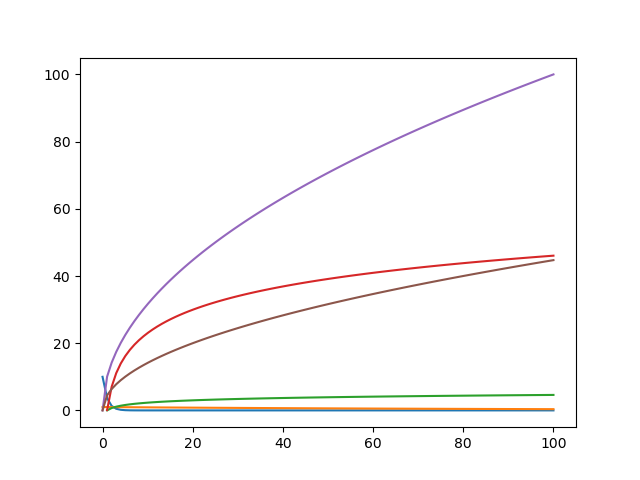

/tmp/ipykernel_976/4223874335.py:7: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)
/tmp/ipykernel_976/4223874335.py:9: RuntimeWarning: divide by zero encountered in log
  y = 10*np.log(x)


In [154]:
fig, ax = plt.subplots()
x = np.linspace(0,100,100)
y = 10*np.exp(-x)
ax.plot(x,y)
y = np.exp(-x/100)
ax.plot(x,y)
y = np.log(x)
ax.plot(x,y)
y = 10*np.log(x)
ax.plot(x,y)
y = 10*np.sqrt(x)
ax.plot(x,y)
y = 10*np.sqrt(x/5)
ax.plot(x,y)

<IPython.core.display.Javascript object>


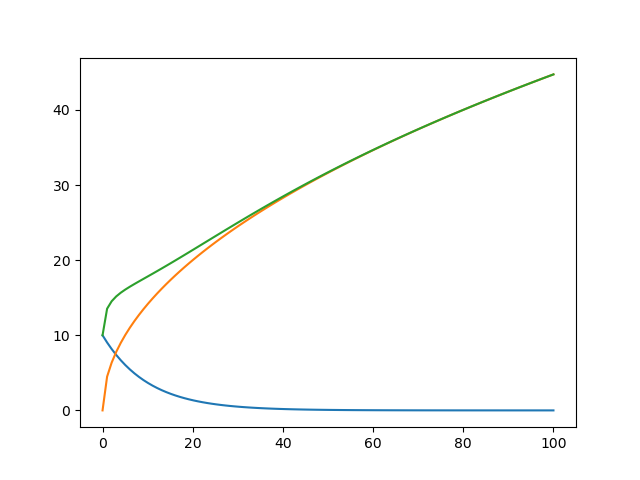

In [173]:
fig, ax = plt.subplots()
x = np.linspace(0,100,100)
y = 10*np.exp(-x/10)
ax.plot(x,y)

y2 = 10*np.sqrt(x/5)
ax.plot(x,y2)

ax.plot(x,y+y2)

<IPython.core.display.Javascript object>


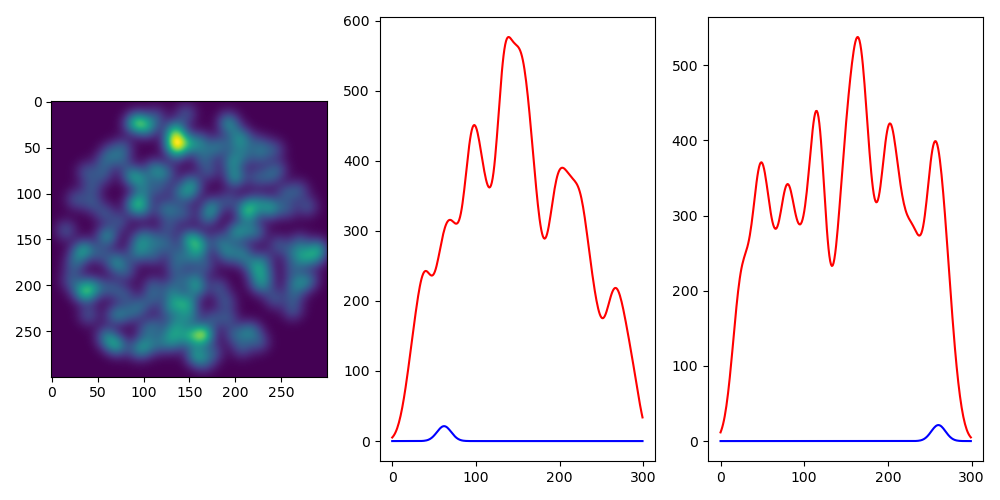

In [186]:
plt.style.use('default')
from matplotlib.animation import FuncAnimation, PillowWriter
%matplotlib notebook
fig, ax  = plt.subplots(1,3, figsize=(10,5), tight_layout=True)

projectionH_old = []
projectionV_old = []
gauss_old = []

def animate(i):
    step = i/50
    global projectionH_old
    global projectionV_old
    global gauss_old
    ax[0].clear()
    ax[1].clear()
    ax[2].clear()
    t = 10*np.sqrt(i)
    x =t*np.cos(np.mod(step,2*np.pi)*t)
    y = t*np.sin(np.mod(step,2*np.pi)*t)
    gauss = makeGaussian(300, fwhm=20, center=(150+x,150+y))
    
    try:
        ax[0].imshow(gauss + gauss_old)
        ax[1].plot(gauss.sum(axis=0), color="b")
        ax[2].plot(gauss.sum(axis=1), color="b")
        ax[1].plot(gauss.sum(axis=0) + gauss_old.sum(axis=0), color="r")
        ax[2].plot(gauss.sum(axis=1) + gauss_old.sum(axis=1), color="r")
        gauss_old = gauss_old + gauss
    except:
        ax[0].imshow(gauss)
        ax[1].plot(gauss.sum(axis=0), color="b")
        ax[2].plot(gauss.sum(axis=1), color="b")
        gauss_old = gauss
        pass
    
    return
    
ani = FuncAnimation(fig, animate, interval=40, blit=True, repeat=False, frames=200)
# ani.save("raster_remnant_spiral_dampened.gif", dpi=300, writer=PillowWriter(fps=10))

<IPython.core.display.Javascript object>


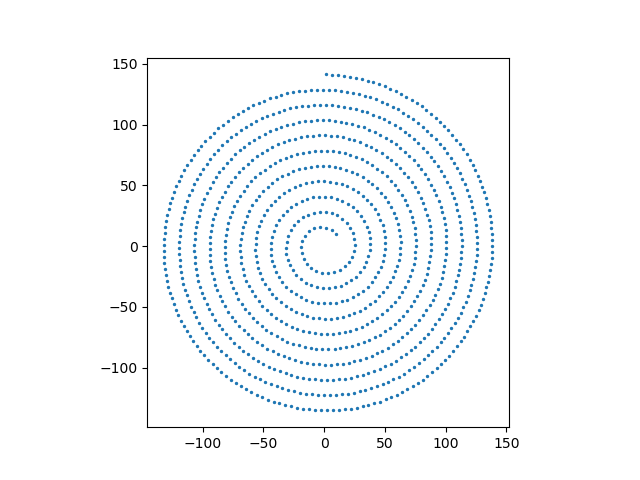

In [297]:
fig, ax = plt.subplots()
r = 2
k = 5
n_scal =1000
n = np.linspace(10,n_scal-1,n_scal)
t = np.linspace(0,4*np.pi,n_scal)
x = r*np.sqrt(k*n)*np.cos(np.sqrt(k*n))
y = r*np.sqrt(k*n)*np.sin(np.sqrt(k*n))

ax.scatter(x,y,s=2)
ax.set_aspect('equal')

<IPython.core.display.Javascript object>


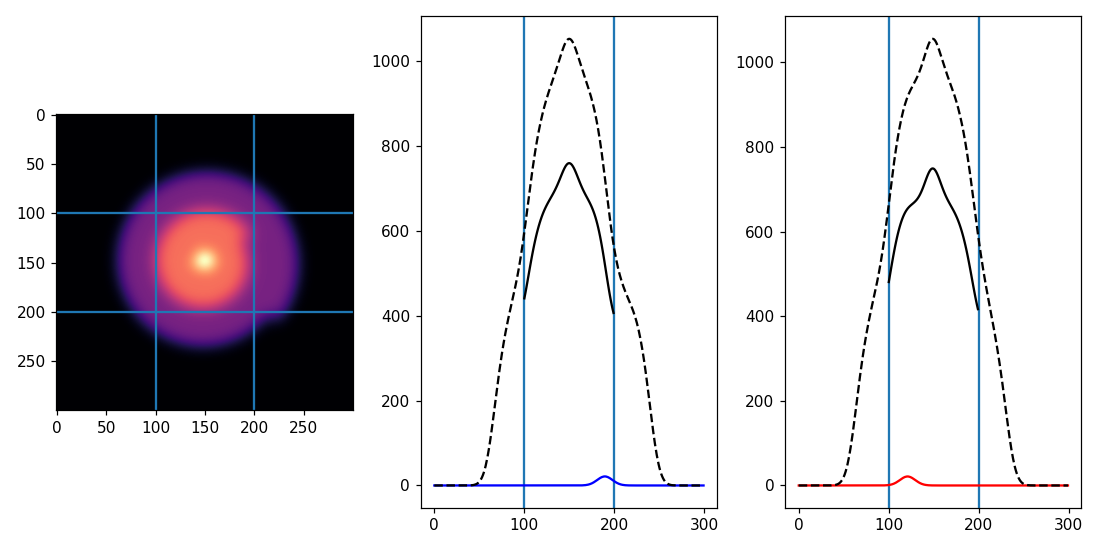

In [22]:
plt.style.use('default')
from matplotlib.animation import FuncAnimation, PillowWriter
%matplotlib notebook
fig, ax  = plt.subplots(1,3, figsize=(10,5), tight_layout=True)

projectionH_old = []
projectionV_old = []
gauss_old = []

frames=200

def animate(i):
    
    global projectionH_old
    global projectionV_old
    global gauss_old
    ax[0].clear()
    ax[1].clear()
    ax[2].clear()
    
    r = 2
    k = 10 #spacing parameter

    t = np.linspace(0,10*np.pi,frames)
    x = r*np.sqrt(k*i)*np.cos(np.sqrt(k*i))
    y = r*np.sqrt(k*i)*np.sin(np.sqrt(k*i))
    
    gauss = makeGaussian(300, fwhm=20, center=(150+x,150+y))
    ax[0].axvline(100)
    ax[0].axvline(200)
    ax[0].axhline(100)
    ax[0].axhline(200)
    
    ax[1].axvline(100)
    ax[1].axvline(200)
    ax[2].axvline(100)
    ax[2].axvline(200)
    
    try:
        ax[0].imshow(gauss + gauss_old, cmap=plt.get_cmap('magma'),)
        ax[1].plot(gauss.sum(axis=0), color="b")
        ax[2].plot(gauss.sum(axis=1), color="r")
        ax[1].plot(np.linspace(0,99,100)+100, gauss[100:200,100:200].sum(axis=0) + gauss_old[100:200,100:200].sum(axis=0), color="k")
        ax[2].plot(np.linspace(0,99,100)+100, gauss[100:200,100:200].sum(axis=1) + gauss_old[100:200,100:200].sum(axis=1), color="k")
        ax[1].plot(gauss.sum(axis=0) + gauss_old.sum(axis=0), color="k", linestyle="--")
        ax[2].plot(gauss.sum(axis=1) + gauss_old.sum(axis=1), color="k", linestyle="--")
        gauss_old = gauss_old + gauss
    except:
        ax[0].imshow(gauss)
        ax[1].plot(gauss.sum(axis=0), color="b")
        ax[2].plot(gauss.sum(axis=1), color="r")
        gauss_old = gauss
        pass
    
    return


ani = FuncAnimation(fig, animate, interval=40, blit=True, repeat=False, frames=frames)
ani.save("gif/raster_remnant_spiral_constant_spaced_2.gif", dpi=300, writer=PillowWriter(fps=10))

<IPython.core.display.Javascript object>


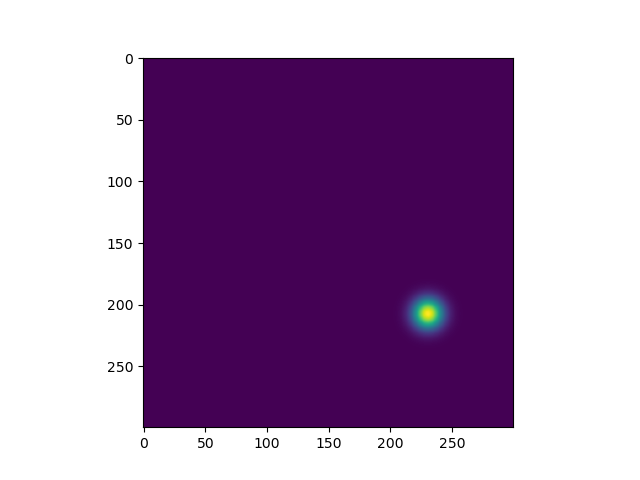

In [247]:
fig, ax = plt.subplots()
ax.imshow(gauss[100:200,100:200])

<IPython.core.display.Javascript object>


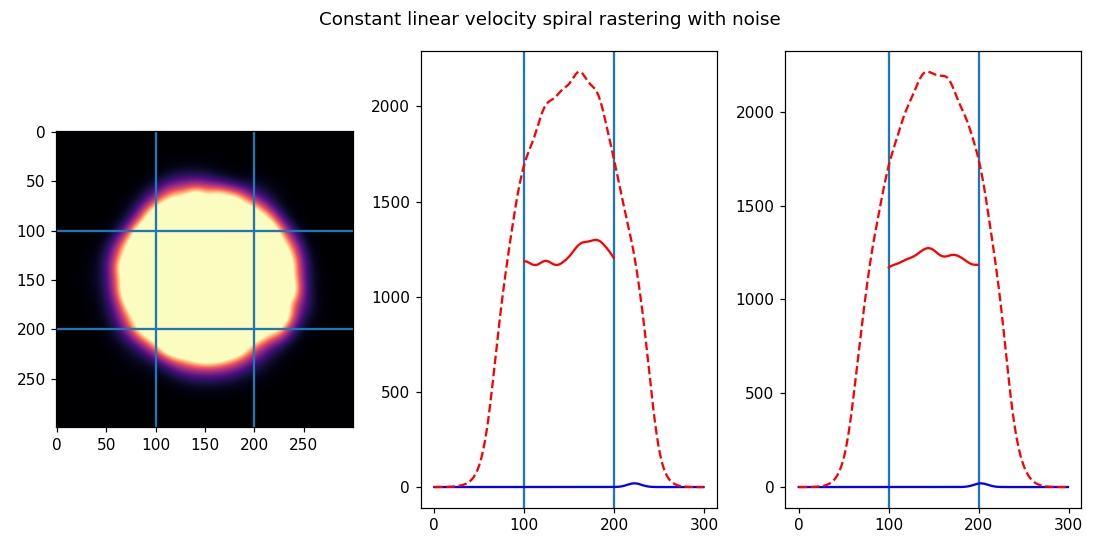

In [25]:
plt.style.use('default')
from matplotlib.animation import FuncAnimation, PillowWriter
%matplotlib notebook
fig, ax  = plt.subplots(1,3, figsize=(10,5), tight_layout=True)
fig.suptitle("Constant linear velocity spiral rastering with noise")

projectionH_old = []
projectionV_old = []
gauss_old = []

frames=200

def animate(i):
    
    
    
    global projectionH_old
    global projectionV_old
    global gauss_old
    ax[0].clear()
    ax[1].clear()
    ax[2].clear()
       
    r = 2
    k = 10 #spacing parameter

    t = np.linspace(0,10*np.pi,frames)
    x = r*np.sqrt(k*i)*np.cos(np.sqrt(k*i))
    y = r*np.sqrt(k*i)*np.sin(np.sqrt(k*i))
    
    if (i==0):
        gauss = np.zeros(shape=(300,300))
    else:
        gauss = makeGaussian(300, fwhm=20+random.uniform(0, 5), center=(150+x,150+y), a=-4+random.uniform(-3, 3))
    ax[0].axvline(100)
    ax[0].axvline(200)
    ax[0].axhline(100)
    ax[0].axhline(200)
    
    ax[1].axvline(100)
    ax[1].axvline(200)
    ax[2].axvline(100)
    ax[2].axvline(200)
    
    try:
        ax[0].imshow(gauss + gauss_old, cmap=plt.get_cmap('magma'), vmin=0, vmax=7)
        ax[1].plot(gauss.sum(axis=0), color="b")
        ax[2].plot(gauss.sum(axis=1), color="b")
        ax[1].plot(np.linspace(0,99,100)+100, gauss[100:200,100:200].sum(axis=0) + gauss_old[100:200,100:200].sum(axis=0), color="r")
        ax[2].plot(np.linspace(0,99,100)+100, gauss[100:200,100:200].sum(axis=1) + gauss_old[100:200,100:200].sum(axis=1), color="r")
        ax[1].plot(gauss.sum(axis=0) + gauss_old.sum(axis=0), color="r", linestyle="--")
        ax[2].plot(gauss.sum(axis=1) + gauss_old.sum(axis=1), color="r", linestyle="--")
        gauss_old = gauss_old + gauss
    except:
        ax[0].imshow(gauss)
        ax[1].plot(gauss.sum(axis=0), color="b")
        ax[2].plot(gauss.sum(axis=1), color="b")
        gauss_old = gauss
        pass
    
    return


ani = FuncAnimation(fig, animate, interval=40, blit=True, repeat=False, frames=frames)
ani.save("/gif/raster_remnant_spiral_constant_spaced_different_intensity.gif", dpi=300, writer=PillowWriter(fps=10))

# Functions of the magnets

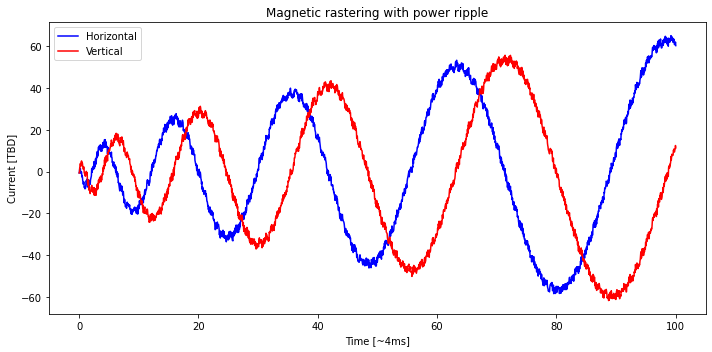

In [134]:
%matplotlib inline
fig, ax  = plt.subplots(figsize=(10,5), tight_layout=True)

projectionH_old = []
projectionV_old = []
gauss_old = []

frames = 2000

randomlist = []
for i in range(frames):
    n = random.uniform(-2,2)
    randomlist.append(n)

i = np.linspace(0,100,frames)
    
r = 2
k = 10 #spacing parameter

t = np.linspace(0,10*np.pi,frames)
noise = np.linspace(0,200*np.pi, frames)
x = r*np.sqrt(k*i)*np.cos(np.sqrt(k*i)) + 1*(randomlist+np.sin(noise))
y = r*np.sqrt(k*i)*np.sin(np.sqrt(k*i)) + 1*(randomlist+np.sin(noise))

ax.plot(i, x, color="b", label="Horizontal")
ax.plot(i, y, color="r", label="Vertical")

ax.legend()
ax.set_xlabel("Time [~4ms]")
ax.set_ylabel("Current [TBD]")
ax.set_title("Magnetic rastering with power ripple")
fig.savefig("fig/magetic_rastering_functions.png", facecolor='white', transparent=False, bbox_inches='tight', dpi=300);

<IPython.core.display.Javascript object>


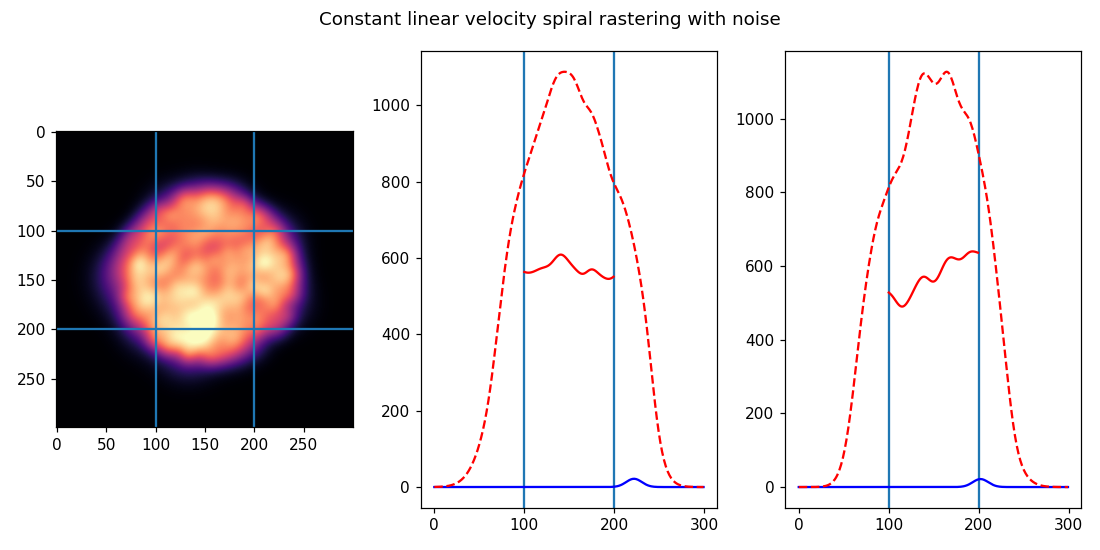

In [125]:
plt.style.use('default')
from matplotlib.animation import FuncAnimation, PillowWriter
%matplotlib notebook
fig, ax  = plt.subplots(1,3, figsize=(10,5), tight_layout=True)
fig.suptitle("Constant linear velocity spiral rastering with noise")

projectionH_old = []
projectionV_old = []
gauss_old = []

frames=200

randomlist = []
for i in range(frames):
    n = random.uniform(-2,2)
    randomlist.append(n)
noise = np.linspace(0,500*np.pi, frames)
    
def animate(i):
    
    global projectionH_old
    global projectionV_old
    global gauss_old
    ax[0].clear()
    ax[1].clear()
    ax[2].clear()
       
    r = 2
    k = 10 #spacing parameter

    t = np.linspace(0,10*np.pi,frames)
    x = r*np.sqrt(k*i)*np.cos(np.sqrt(k*i)) + 1*(randomlist[i]+np.sin(noise[i]))
    y = r*np.sqrt(k*i)*np.sin(np.sqrt(k*i)) + 1*(randomlist[i]+np.sin(noise[i]))
    
    if (i==0):
        gauss = np.zeros(shape=(300,300))
    else:
        gauss = makeGaussian(300, fwhm=20+random.uniform(0, 5), center=(150+x,150+y), a=-4+random.uniform(-3, 3))
    ax[0].axvline(100)
    ax[0].axvline(200)
    ax[0].axhline(100)
    ax[0].axhline(200)
    
    ax[1].axvline(100)
    ax[1].axvline(200)
    ax[2].axvline(100)
    ax[2].axvline(200)
    
    try:
        ax[0].imshow(gauss + gauss_old, cmap=plt.get_cmap('magma'), vmin=0, vmax=7)
        ax[1].plot(gauss.sum(axis=0), color="b")
        ax[2].plot(gauss.sum(axis=1), color="b")
        ax[1].plot(np.linspace(0,99,100)+100, gauss[100:200,100:200].sum(axis=0) + gauss_old[100:200,100:200].sum(axis=0), color="r")
        ax[2].plot(np.linspace(0,99,100)+100, gauss[100:200,100:200].sum(axis=1) + gauss_old[100:200,100:200].sum(axis=1), color="r")
        ax[1].plot(gauss.sum(axis=0) + gauss_old.sum(axis=0), color="r", linestyle="--")
        ax[2].plot(gauss.sum(axis=1) + gauss_old.sum(axis=1), color="r", linestyle="--")
        gauss_old = gauss_old + gauss
    except:
        ax[0].imshow(gauss)
        ax[1].plot(gauss.sum(axis=0), color="b")
        ax[2].plot(gauss.sum(axis=1), color="b")
        gauss_old = gauss
        pass
    
    return


ani = FuncAnimation(fig, animate, interval=40, blit=True, repeat=False, frames=frames)
ani.save("/gif/raster_remnant_spiral_constant_spaced_different_intensity_noisy_current.gif", dpi=300, writer=PillowWriter(fps=10))